# Compute IP/EA with NWChem USING Diffuse Basis Functions
Check on how the calculations are doing. What the run times are, what fractions have completed, etc.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from moldesign.simulate.qcfractal import GeometryDataset, SolvationEnergyDataset, HessianDataset, SinglePointDataset, collect_molecular_properties
import pandas as pd
import numpy as np

RDKit WARNING: [14:23:30] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import os
qca_pwd = 'bTYl1h3cVYY_nQ2tGl3cuEWWnVNmL9WPoH9HF9_3-bQ'
os.environ['QCAUSR'] = qca_pwd

## Review Vertical Energies
Starting with the XTB geometry

In [3]:
xtb_vert = SinglePointDataset('Electrolyte XTB Neutral Geometry, Diffuse-Basis Energy', 'nwchem', 'diffuse_basis')

Pull down a summary

In [4]:
records = xtb_vert.get_complete_records()
runtimes = records.apply(lambda x: x.provenance.wall_time)
print(f'Completed {len(records)} single point energy computations')

Completed 2299 single point energy computations


In [5]:
(runtimes / 60).describe()

count    2299.000000
mean       23.782010
std        67.979145
min         0.168992
25%         0.935198
50%         2.240231
75%        10.811301
max       999.717006
Name: record, dtype: float64

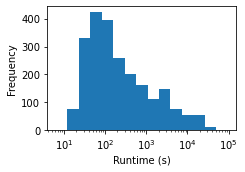

In [6]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

min_ = np.log10(runtimes.min())
max_ = np.log10(runtimes.max())
ax.hist(runtimes, bins=np.logspace(min_ - 0.2, max_ + 0.2, 16))

ax.set_xscale('log')
ax.set_xlabel('Runtime (s)')
ax.set_ylabel('Frequency')

fig.tight_layout()

## Compute the redox properties
Save them to disk for later user

## Vertical IPs
Fastest approximation, especially when we start with the XTB geometry

In [7]:
redox_data = collect_molecular_properties(xtb_vert, None)
print(f'Calculations completed for {len(redox_data)} molecules')

RDKit WARNING: [14:24:01] Cannot assign bond directions!


Calculations completed for 760 molecules


In [8]:
redox_data.to_csv('datasets/diffuse-basis_vertical-xtb_redox.csv', index=False)